## Sprint セグメンテーション1

### 1.このSprintについて


#### Sprintの目的
コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ

#### どのように学ぶか
公開されている実装を用いてKaggleコンペティションのデータでセグメンテーションを行います。

### 2.セグメンテーション


KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)

セグメンテーション手法としてU-Net[1]を使います。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)

#### 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

《GPU環境での学習》

大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。

《新たなデータセットの適用》

公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。


In [ ]:
# !pip install tensorflow==1.15.0

In [2]:
import tensorflow

In [3]:
tensorflow.__version__

'1.15.0'

In [ ]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 9.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
# !pip install kaggle

In [4]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!mkdir .u_net

In [ ]:

import json

token = {"username":"********************************","key":"********************************"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!ls -a .kaggle

.  ..  kaggle.json


In [ ]:
!mkdir /root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# !kaggle competitions list

In [ ]:
#  カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())


/content/drive/My Drive


In [ ]:
#https://www.kaggle.com/c/tgs-salt-identification-challenge
# !kaggle competitions download -c tgs-salt-identification-challenge

In [ ]:
# !unzip /content/drive/'My Drive'/flamingo.zip -d Flamingo

In [ ]:
# !unzip /content/drive/'My Drive'/train.zip -d train

In [ ]:
# !unzip /content/drive/'My Drive'/test.zip -d test

In [ ]:
# !unzip /content/drive/'My Drive'/competition_data.zip -d competition_data

In [ ]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 18.38 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Checking out files: 100% (253/253), done.


In [5]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/MyDrive/unet')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/MyDrive/unet


In [6]:
ls

 data/               LICENSE        README.md           tgs_salt.h5
 dataPrepare.ipynb   main.py        save/               trainUnet.ipynb
 data.py             model.py       test_rename/        unet_membrane.hdf5
 img/                __pycache__/  'test_rename (1)'/


In [ ]:
DATA_DIR = '/content/drive/MyDrive/unet/'
train = pd.read_hdf(DATA_DIR + 'tgs_salt.h5', key='train')
test = pd.read_hdf(DATA_DIR + 'tgs_salt.h5', key='test')
submission = pd.read_hdf(DATA_DIR + 'tgs_salt.h5', key='submission')
train.head()


,rle_mask,z,images,masks,has_salt
id,,,,,
575d24d81d,NaN,843,"[[134, 131, 134, 137, 136, 136, 136, 134, 123,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False
a266a2a9df,5051 5151,794,"[[87, 96, 85, 57, 51, 92, 110, 122, 141, 141, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False
75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,468,"[[145, 119, 83, 67, 70, 67, 56, 77, 113, 101, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False
34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,727,"[[138, 121, 101, 78, 52, 32, 21, 26, 47, 79, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False
4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,797,"[[17, 20, 23, 27, 30, 32, 34, 36, 36, 36, 38, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False


In [ ]:
test.head()

,rle_mask,z,images
id,,,
155410d6fa,1 1,559,"[[189, 188, 188, 187, 188, 188, 188, 188, 189,..."
78b32781d1,1 1,298,"[[187, 179, 163, 144, 126, 112, 112, 118, 120,..."
63db2a476a,1 1,392,"[[112, 113, 113, 112, 111, 112, 113, 115, 119,..."
17bfcdb967,1 1,698,"[[135, 118, 113, 126, 146, 155, 165, 181, 170,..."
7ea0fd3c88,1 1,837,"[[122, 147, 159, 157, 132, 121, 111, 83, 80, 8..."


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img

Using TensorFlow backend.


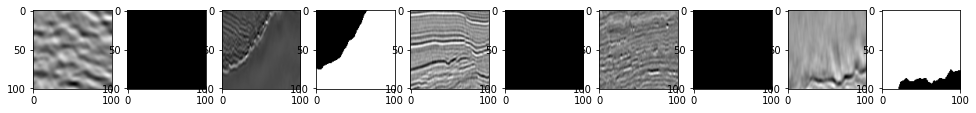

In [ ]:
ids= ['000e218f21','13483cd62a','00441f1cf2','28a1187a4e','5a02df7676']

#imagesとmasks画像を表示
plt.figure(figsize=(20,10))
for j, img_name in enumerate(ids):
    q = j+1
    img = load_img('/content/drive/MyDrive/Salt Identification/train/images/' + img_name + '.png') #imagesの画像
    img_mask = load_img('/content/drive/MyDrive/Salt Identification/train/masks/' + img_name + '.png') #masksの画像
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

In [8]:
from model import *
from data import *

Using TensorFlow backend.


In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/content/drive/MyDrive/Salt Identification/train','images','masks',data_gen_args,save_to_dir = '/content/drive/MyDrive/unet/save')
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=10,epochs=1,callbacks=[model_checkpoint])

/content/drive/My Drive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)




Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
10/10 [==============================] - 235s 24s/step - loss: 1.1180 - acc: 0.8330

Epoch 00001: loss improved from inf to 1.11801, saving model to unet_membrane.hdf5


In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

In [ ]:
# import os
# import glob

# path = "/content/drive/MyDrive/Salt Identification/test/images"
# files = glob.glob(path + '/*')

# for i, f in enumerate(files):
#     ftitle, fext = os.path.splitext(f)
#     os.rename(f, '{}'.format(i) + fext)

In [ ]:
# import shutil
# import glob
# import os

# def move_glob(dst_path, pathname, recursive=True):
#     for p in glob.glob(pathname, recursive=recursive):
#         shutil.move(p, dst_path)


In [ ]:
# move_glob('/content/drive/MyDrive/unet/test_rename', '/content/drive/MyDrive/unet/*.png')


In [10]:
testGene = testGenerator("/content/drive/MyDrive/unet/test_rename (1)")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,5,verbose=1)
saveResult("/content/drive/MyDrive/Salt Identification/test/images/",results)

/content/drive/MyDrive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


5/5 [==============================] - 11s 2s/step


/content/drive/MyDrive/unet/data.py:124: UserWarning: /content/drive/MyDrive/Salt Identification/test/images/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/unet/data.py:124: UserWarning: /content/drive/MyDrive/Salt Identification/test/images/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/unet/data.py:124: UserWarning: /content/drive/MyDrive/Salt Identification/test/images/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/unet/data.py:124: UserWarning: /content/drive/MyDrive/Salt Identification/test/images/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/unet/data.py:124: UserWarning: /content/drive/MyDrive/Salt Identification/test/images/4_predict.png is a low contrast image
  io.imsave(os.path.join(

#####【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

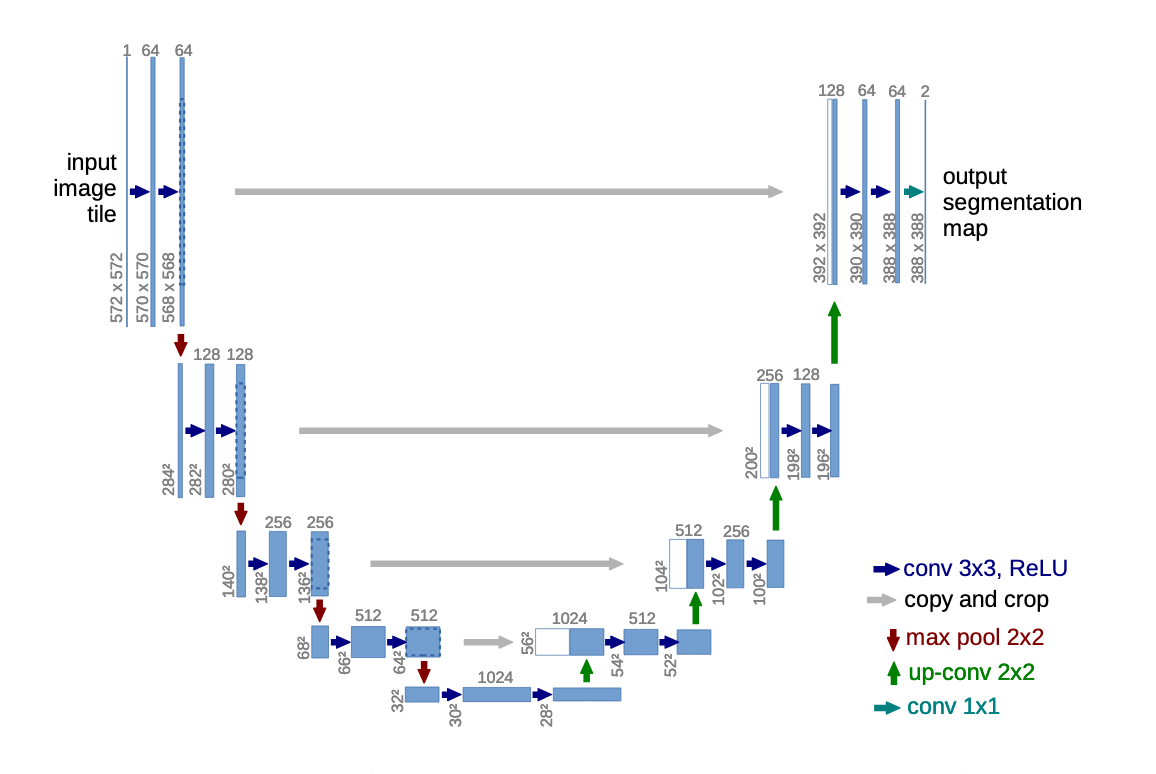![image.png](![image.png]())

セグメンテーションにおいて、sliding-windowconvolutional networを上回る性能を示した


次に読みたい論文  
[Caffe: Convolutional Architecture for Fast Feature Embedding](https://arxiv.org/abs/1408.5093)

In [ ]:
#kerasを用いて構成されている

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

#デフォルトのインプットは256256,1となっている
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)

  #2つの3*3 の畳み込みを適用する、それぞれrelu にて活性化が行われている。
  #その後にダウンサンプリングのためのストライド2の2*2のmaxプーリングで構成されている。
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

  #これを繰り返すことで構成される。
  #ダウンサンプリングの各ステップで、特徴チャネルの数を2倍にします。
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)


    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)


    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
 #ダウンサンプリングされたものと、アップサンプリングされたものを結合
 #アップサンプリングでは結合したのちに畳み込み逆畳み込みが行われる
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)



    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

#畳み込みの際に境界線のピクセルが失われるため、クロッピングが必要になる。
  #1*1の畳み込みを行い、64の特徴ベクトルを必要な数のクラスにマッピングを行う。
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

#モデルを定義
    model = Model(input = inputs, output = conv10)
#コンパイル
#オプティマイザはAdamで学習率は1e-4　
#損失計算はバイナリクロスエントロピ　→　   ２値分類ということがわかる
#accuracyにて精度確認を行う
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()
#もし重みがあるならロード
    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [ ]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#画像拡張
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
#画像をパスから取得
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

#モデルをロード
model = unet()
#チェックポイント作成
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
#学習
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])
#パスからテスト画像を取得
testGene = testGenerator("data/membrane/test")
#推定
results = model.predict_generator(testGene,30,verbose=1)
#結果を保存
saveResult("data/membrane/test",results)